## Importing Required Packages

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from tensorflow.keras.preprocessing import image
from sklearn.metrics import log_loss

## Mounting Drive into Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Setting paths

In [ ]:
# Paths
data_dir = '/content/drive/MyDrive/Brain_cancer_detection'
train_dir = os.path.join(data_dir, 'TrainingDataset')
test_dir = os.path.join(data_dir, 'TestDataset')

In [ ]:
train_dir = r'/content/drive/MyDrive/Brain Cancer Detection/Training'
test_dir = r'/content/drive/MyDrive/Brain Cancer Detection/Testing'

## Hyper parameters and Data Augmentation

In [ ]:
# Hyperparameters
IMG_SIZE = (128, 128)
BATCH_SIZE = 4
EPOCHS = 10

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
  #  rotation_range=60,
  #  width_shift_range=1.0,
  #  height_shift_range=1.0,
  #  shear_range=1.0,
  #  zoom_range=1.0,
  #  horizontal_flip=True,
    validation_split=0.15
)

In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)
test_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255, validation_split= 0.15)

# Data Loading with Train-Test Split
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='training',classes=['notumor', 'glioma', 'meningioma','pituitary'])
val_generator = val_datagen.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='validation',classes=['notumor', 'glioma', 'meningioma','pituitary'])

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=IMG_SIZE, batch_size=4, class_mode='categorical', shuffle=False, classes=['notumor', 'glioma', 'meningioma','pituitary'])

Found 172 images belonging to 4 classes.
Found 28 images belonging to 4 classes.
Found 164 images belonging to 4 classes.


## Creating a basic Transfer Learning Model

In [ ]:
# Load Pretrained Models
def create_model(base_model):
    base_model.trainable = False
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    predictions = Dense(4, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model


## Loading VGG16 Model

In [ ]:

# VGG16 Model
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
vgg16_model = create_model(vgg16_base)
vgg16_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

## Training VGG16 Model

In [ ]:

# Training VGG16
vgg_checkpoint = ModelCheckpoint('/content/drive/MyDrive/Brain Cancer Detection/Saved_models/vgg16_bestmodel.h5', monitor='val_loss', save_best_only=True)
vgg16_model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS, callbacks=[vgg_checkpoint])

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 794ms/step - accuracy: 0.3511 - loss: 1.4090

43/43 ━━━━━━━━━━━━━━━━━━━━ 43s 956ms/step - accuracy: 0.3515 - loss: 1.4085 - val_accuracy: 0.5357 - val_loss: 1.1500
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 783ms/step - accuracy: 0.6162 - loss: 1.0454

43/43 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.6164 - loss: 1.0452 - val_accuracy: 0.7500 - val_loss: 1.0091
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 785ms/step - accuracy: 0.7125 - loss: 0.8633

43/43 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.7116 - loss: 0.8644 - val_accuracy: 0.6786 - val_loss: 0.9228
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 783ms/step - accuracy: 0.7577 - loss: 0.7674

43/43 ━━━━━━━━━━━━━━━━━━━━ 41s 949ms/step - accuracy: 0.7577 - loss: 0.7672 - val_accuracy: 0.8214 - val_loss: 0.8127
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 784ms/step - accuracy: 0.7943 - loss: 0.7458

43/43 ━━━━━━━━━━━━━━━━━━━━ 39s 912ms/step - accuracy: 0.7943 - loss: 0.7453 - val_accuracy: 0.7857 - val_loss: 0.7586
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 41s 938ms/step - accuracy: 0.7856 - loss: 0.7179 - val_accuracy: 0.7500 - val_loss: 0.7682
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 783ms/step - accuracy: 0.8400 - loss: 0.5822

43/43 ━━━━━━━━━━━━━━━━━━━━ 41s 950ms/step - accuracy: 0.8401 - loss: 0.5821 - val_accuracy: 0.8929 - val_loss: 0.6273
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 783ms/step - accuracy: 0.8582 - loss: 0.6070

43/43 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.8581 - loss: 0.6061 - val_accuracy: 0.8571 - val_loss: 0.6024
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 41s 947ms/step - accuracy: 0.8722 - loss: 0.5514 - val_accuracy: 0.7857 - val_loss: 0.6348
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 783ms/step - accuracy: 0.8704 - loss: 0.4898

43/43 ━━━━━━━━━━━━━━━━━━━━ 39s 911ms/step - accuracy: 0.8706 - loss: 0.4890 - val_accuracy: 0.8929 - val_loss: 0.5200


## Loading ResNet50 Model

In [ ]:

# ResNet50 Model
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
resnet_model = create_model(resnet_base)
resnet_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

## Training ResNet50 Model

In [ ]:
# Training ResNet50
resnet_checkpoint = ModelCheckpoint('/content/drive/MyDrive/Brain Cancer Detection/Saved_models/resnet_best_model.h5', monitor='val_loss', save_best_only=True)
resnet_model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS, callbacks=[resnet_checkpoint])

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.3322 - loss: 1.4457

43/43 ━━━━━━━━━━━━━━━━━━━━ 28s 409ms/step - accuracy: 0.3314 - loss: 1.4455 - val_accuracy: 0.3571 - val_loss: 1.3734
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.2524 - loss: 1.4966

43/43 ━━━━━━━━━━━━━━━━━━━━ 15s 339ms/step - accuracy: 0.2523 - loss: 1.4956 - val_accuracy: 0.2857 - val_loss: 1.3581
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.2600 - loss: 1.4055

43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 333ms/step - accuracy: 0.2610 - loss: 1.4056 - val_accuracy: 0.3929 - val_loss: 1.3444
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.3071 - loss: 1.3998

43/43 ━━━━━━━━━━━━━━━━━━━━ 16s 370ms/step - accuracy: 0.3063 - loss: 1.4005 - val_accuracy: 0.5357 - val_loss: 1.3352
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.3034 - loss: 1.3721

43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 331ms/step - accuracy: 0.3043 - loss: 1.3718 - val_accuracy: 0.5000 - val_loss: 1.3245
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.2558 - loss: 1.3992

43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 338ms/step - accuracy: 0.2567 - loss: 1.3985 - val_accuracy: 0.5357 - val_loss: 1.3167
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.2787 - loss: 1.3748

43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 333ms/step - accuracy: 0.2792 - loss: 1.3746 - val_accuracy: 0.5000 - val_loss: 1.3075
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.4472 - loss: 1.2619

43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 334ms/step - accuracy: 0.4449 - loss: 1.2633 - val_accuracy: 0.6071 - val_loss: 1.3001
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.4117 - loss: 1.3031

43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 327ms/step - accuracy: 0.4104 - loss: 1.3034 - val_accuracy: 0.5357 - val_loss: 1.2921
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.3268 - loss: 1.3481

43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 331ms/step - accuracy: 0.3272 - loss: 1.3478 - val_accuracy: 0.5714 - val_loss: 1.2858


## Creating a function to Evaluate the Models and Visualizing Performances

In [ ]:
# Evaluate Models with Multi-Class Metrics
def evaluate_model(model, name):
    print(f"Evaluating {name}...")
    test_generator.reset()
    y_true = test_generator.classes
    y_pred = model.predict(test_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Classification Report
    print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.savefig(f'{name}_confusion_matrix.png')
    plt.show()

    # Precision, Recall, F1-score
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred_classes, average='weighted')
    print(f"{name} - Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")

    # AUC-ROC Curve (One-vs-Rest strategy)
    for i, class_name in enumerate(test_generator.class_indices.keys()):
        fpr, tpr, _ = roc_curve(y_true == i, y_pred[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{class_name} AUC = {roc_auc:.2f}')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.savefig(f'{name}_roc_curve.png')
    plt.show()


    # Log Loss
    logloss = log_loss(y_true, y_pred)
    print(f"{name} - Log Loss: {logloss:.4f}")

In [ ]:
# Load Best Models for Evaluation
vgg16_path = r'/content/drive/MyDrive/Brain Cancer Detection/Saved_models/VGG16_Best_Model.h5'
best_vgg16 = tf.keras.models.load_model(vgg16_path)
best_resnet = tf.keras.models.load_model('resnet_best_model.h5')

## VGG16 - Evaluation & Visualization

Evaluating VGG16...
41/41 ━━━━━━━━━━━━━━━━━━━━ 33s 798ms/step
              precision    recall  f1-score   support

     notumor       0.29      0.72      0.41        25
      glioma       0.60      0.24      0.34        25
  meningioma       0.00      0.00      0.00        25
   pituitary       0.80      0.40      0.54        89

    accuracy                           0.37       164
   macro avg       0.42      0.34      0.32       164
weighted avg       0.57      0.37      0.41       164



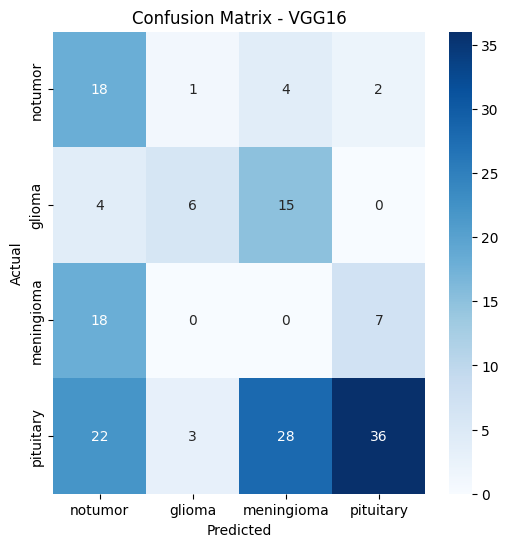

VGG16 - Precision: 0.57, Recall: 0.37, F1-score: 0.41


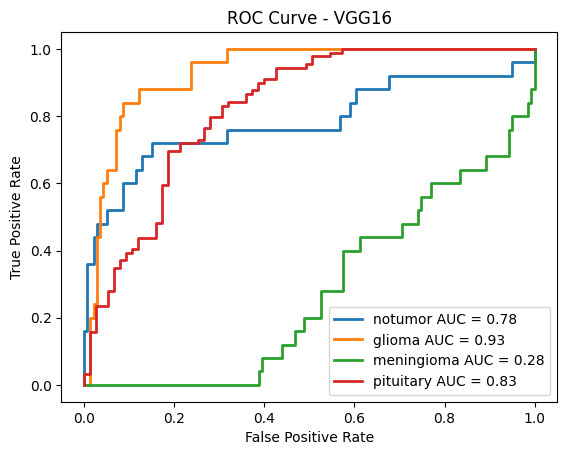

VGG16 - Log Loss: 1.4930


In [ ]:
evaluate_model(best_vgg16, "VGG16")

## ResNet50 - Evaluation & Visualization

Evaluating ResNet50...
41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 263ms/step
              precision    recall  f1-score   support

     notumor       0.31      0.36      0.33        25
      glioma       0.17      0.40      0.24        25
  meningioma       0.04      0.08      0.05        25
   pituitary       0.61      0.19      0.29        89

    accuracy                           0.23       164
   macro avg       0.28      0.26      0.23       164
weighted avg       0.41      0.23      0.25       164



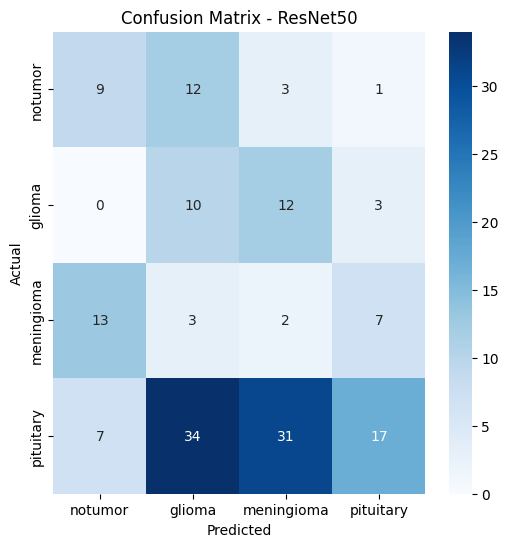

ResNet50 - Precision: 0.41, Recall: 0.23, F1-score: 0.25


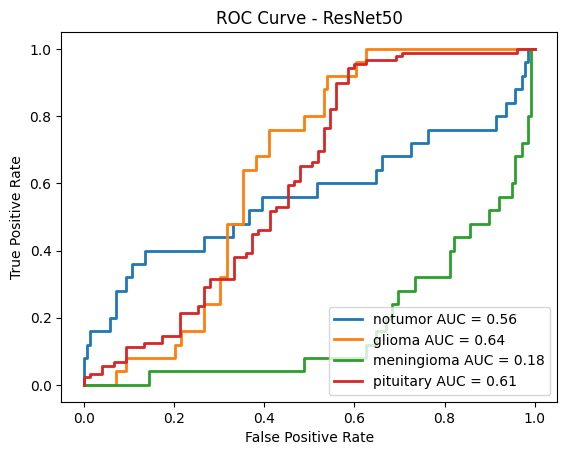

ResNet50 - Log Loss: 1.3924


In [ ]:
evaluate_model(best_resnet, "ResNet50")

# Prediction Part

## Loading Models from drive

In [ ]:
# Load the trained model
model_path = r'/content/drive/MyDrive/Brain Cancer Detection/Saved_models/VGG16_Best_Model.h5'  # Change if using ResNet
model = tf.keras.models.load_model(model_path)

## Class labels

In [ ]:
# Class labels
class_labels = ["notumor","glioma","meningioma","pituitary"]  # Ensure this matches your dataset labels

## Function to preprocess and predict an image

In [ ]:
def predict_image(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = np.max(predictions) * 100

    # Display the image and prediction
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {class_labels[predicted_class]} ({confidence:.2f}%)")
    plt.show()

    return class_labels[predicted_class], confidence

## Predicting Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


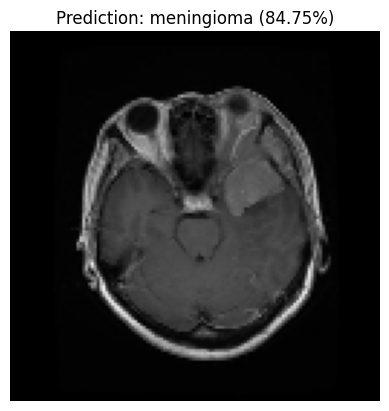

Predicted Class: meningioma with Confidence: 84.75%


In [ ]:
image_path = "/content/drive/MyDrive/Brain Cancer Detection/Testing/meningioma/M_20.jpg"  # Change this path1
predicted_label, confidence = predict_image(image_path)
print(f"Predicted Class: {predicted_label} with Confidence: {confidence:.2f}%")